## Credit Card Fraud Case Study

### Importing basic modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pip install scikit-learn==1.0.2 

Note: you may need to restart the kernel to use updated packages.


### Importing Data

In [3]:
train = pd.read_csv('fraudTrain.csv')
test = pd.read_csv('fraudTest.csv')
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
print(test.shape),print(train.shape)

(555719, 23)
(1296675, 23)


(None, None)

### Data Cleaning 

In [5]:
test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
test.info(), train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

(None, None)

Converting dob,trans_date_trans_time  column in both test & train to datetime data type and creating new 'trans_date' column - 

In [8]:
train['trans_date_trans_time']=pd.to_datetime(train['trans_date_trans_time'])
train['trans_date']=train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train['trans_date']=pd.to_datetime(train['trans_date'])
train['dob']=pd.to_datetime(train['dob'])

test['trans_date_trans_time']=pd.to_datetime(test['trans_date_trans_time'])
test['trans_date']=test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test['trans_date']=pd.to_datetime(test['trans_date'])
test['dob']=pd.to_datetime(test['dob'])

In [9]:
test.trans_date.head(),test.dob.head(),train.trans_date.head(),train.dob.head()

(0   2020-06-21
 1   2020-06-21
 2   2020-06-21
 3   2020-06-21
 4   2020-06-21
 Name: trans_date, dtype: datetime64[ns],
 0   1968-03-19
 1   1990-01-17
 2   1970-10-21
 3   1987-07-25
 4   1955-07-06
 Name: dob, dtype: datetime64[ns],
 0   2019-01-01
 1   2019-01-01
 2   2019-01-01
 3   2019-01-01
 4   2019-01-01
 Name: trans_date, dtype: datetime64[ns],
 0   1988-03-09
 1   1978-06-21
 2   1962-01-19
 3   1967-01-12
 4   1986-03-28
 Name: dob, dtype: datetime64[ns])

Removing unnamed column

In [10]:
train.drop("Unnamed: 0",axis=1,inplace=True)
test.drop("Unnamed: 0",axis=1,inplace=True)
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01


### EDA, Feature Engineering

### Categorical Variable Analysis

In [11]:
total = pd.concat([test,train])
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

In [12]:
total["is_fraud_cat"]=total.is_fraud.apply(lambda x: "T" if x==1 else "F")
total["is_fraud_cat"].astype("object")

0          F
1          F
2          F
3          F
4          F
          ..
1296670    F
1296671    F
1296672    F
1296673    F
1296674    F
Name: is_fraud_cat, Length: 1852394, dtype: object

In [13]:
totalcat=total.select_dtypes(include=['object'])

In [14]:
total[totalcat.columns]

,merchant,category,first,last,gender,street,city,state,job,trans_num,is_fraud_cat
0,fraud_Kirlin and Sons,personal_care,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,F
1,fraud_Sporer-Keebler,personal_care,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,F
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,"Librarian, public",c81755dbbbea9d5c77f094348a7579be,F
3,fraud_Haley Group,misc_pos,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,Set designer,2159175b9efe66dc301f149d3d5abf8c,F
4,fraud_Johnston-Casper,travel,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,Furniture designer,57ff021bd3f328f8738bb535c302a31b,F
...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,Geoscientist,440b587732da4dc1a6395aba5fb41669,F
1296671,fraud_Abernathy and Sons,food_dining,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,"Production assistant, television",278000d2e0d2277d1de2f890067dcc0a,F
1296672,fraud_Stiedemann Ltd,food_dining,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,Naval architect,483f52fe67fabef353d552c1e662974c,F
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,Volunteer coordinator,d667cdcbadaaed3da3f4020e83591c83,F


C:\Users\surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


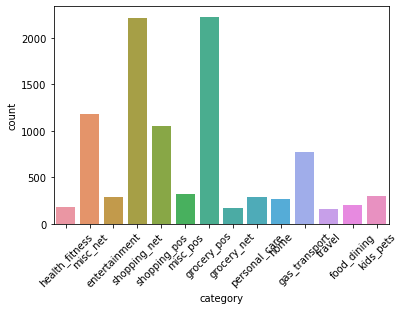

In [15]:
sns.countplot(total[total['is_fraud_cat']=="T"].category)
plt.xticks(rotation=45)
plt.show()

#### Insight- 
Most frauds occured in categories of shopping_net and grocery_pos

C:\Users\surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


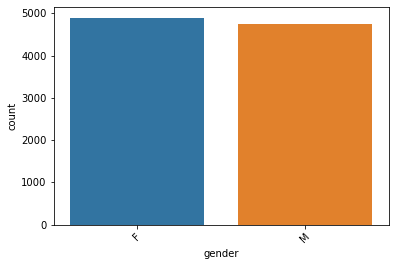

In [16]:
sns.countplot(total[total['is_fraud_cat']=="T"].gender)
plt.xticks(rotation=45)
plt.show()

#### Insight- 
Although more cases of fraud happened with female customers, the number is almost  the same for both Males and Females

C:\Users\surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


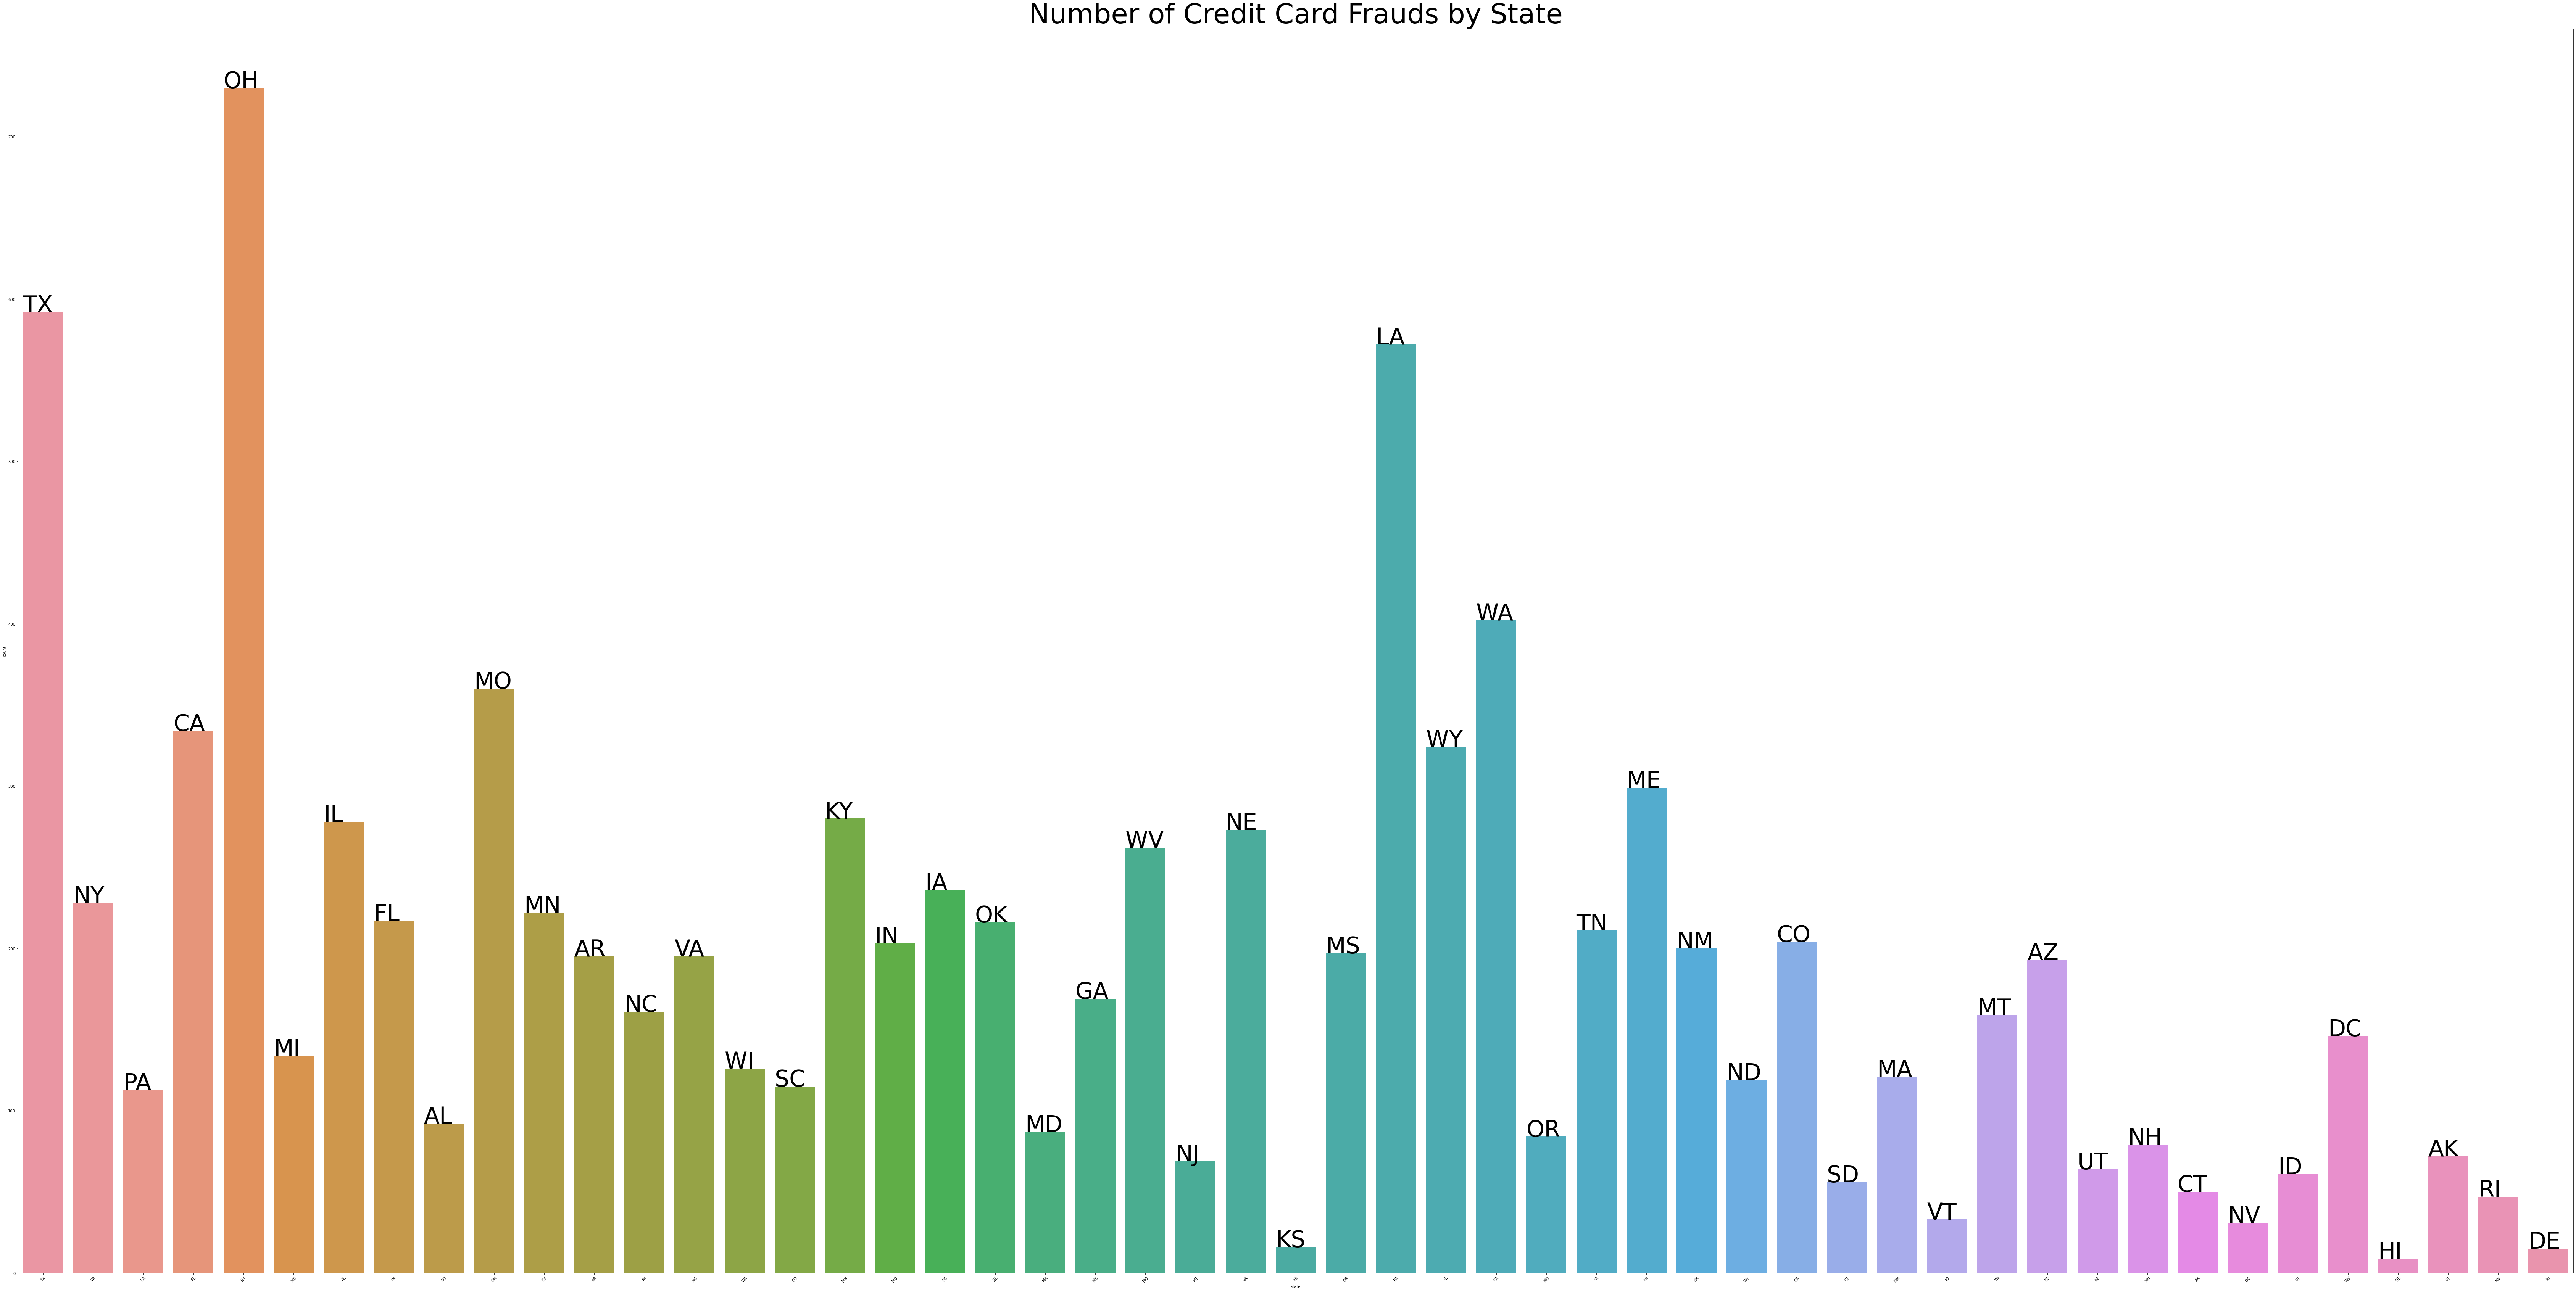

In [17]:
fig, ax = plt.subplots(figsize=(120,60))
plt.rcParams.update({'font.size': 60})
sns.countplot(total[total['is_fraud_cat']=="T"].state)
plt.xticks(rotation=45)
for p, label in zip(ax.patches, total["state"].value_counts().index):
    ax.annotate(label, (p.get_x(), p.get_height()+0.15))
plt.title("Number of Credit Card Frauds by State")
plt.show()

#### Insight- 
States OH, TX and LA report the most number of credit card frauds

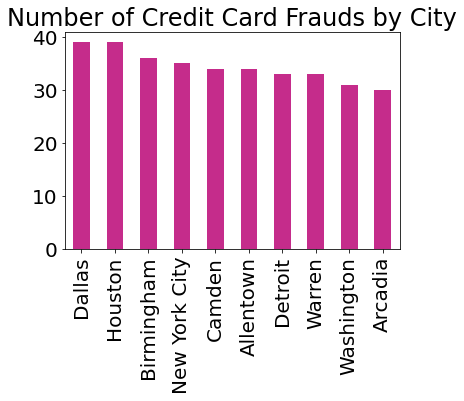

In [18]:
import random
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb
plt.rcParams.update({'font.size': 20})
total[total['is_fraud_cat']=="T"]["city"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color=randomcolor())
plt.title("Number of Credit Card Frauds by City")
plt.show()

#### Insight- 
Dallas,Houston and Birmingham report the most frauds city wise.

In [33]:
# train

print(train[train['is_fraud']==1]["job"].value_counts(sort=True,ascending=False).head(10))
ans = train[train['is_fraud']==1]["job"].value_counts(sort=True,ascending=False).head(10)

Materials engineer                       62
Trading standards officer                56
Naval architect                          53
Exhibition designer                      51
Surveyor, land/geomatics                 50
Mechanical engineer                      49
Prison officer                           48
Quantity surveyor                        48
Audiological scientist                   46
Senior tax professional/tax inspector    45
Name: job, dtype: int64


In [34]:
a = ans.to_dict()
print(a)

{'Materials engineer': 62, 'Trading standards officer': 56, 'Naval architect': 53, 'Exhibition designer': 51, 'Surveyor, land/geomatics': 50, 'Mechanical engineer': 49, 'Prison officer': 48, 'Quantity surveyor': 48, 'Audiological scientist': 46, 'Senior tax professional/tax inspector': 45}


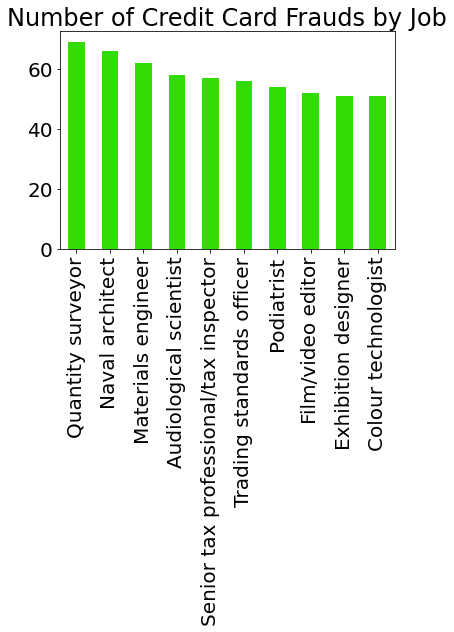

In [19]:
total[total['is_fraud_cat']=="T"]["job"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color=randomcolor())
plt.title("Number of Credit Card Frauds by Job")
plt.show()

#### Insight- 
Most frauds occured in jobs of quantity surveyor followed by naval architect and materials engineer

### Numerical Variable Analysis
checking the spread & skewness of all numerical variables

In [20]:
del total['is_fraud_cat']
from scipy.stats import norm, skew

In [21]:
#finding numerical columns
testnum= test.select_dtypes(include=np.number)
test[testnum.columns]

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2291163933867244,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,3573030041201292,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,3598215285024754,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,3591919803438423,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,3526826139003047,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,43.77,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0
555715,3556613125071656,111.84,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0
555716,6011724471098086,86.88,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0
555717,4079773899158,7.99,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0


In [22]:
total.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
trans_date               0
dtype: int64

In [23]:
total[testnum.columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      int64  
 1   amt         float64
 2   zip         int64  
 3   lat         float64
 4   long        float64
 5   city_pop    int64  
 6   unix_time   int64  
 7   merch_lat   float64
 8   merch_long  float64
 9   is_fraud    int64  
dtypes: float64(5), int64(5)
memory usage: 155.5 MB


C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


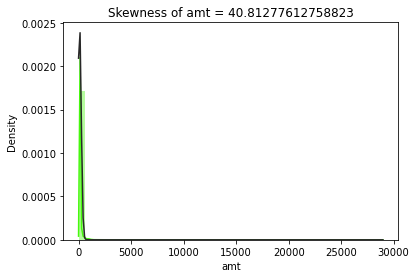

In [24]:
plt.rcParams.update({'font.size': 10})
skewness = str(skew(total['amt']))
sns.distplot(total['amt'],fit = norm,color = randomcolor())
plt.title("Skewness of amt"+" = "+skewness)
plt.show()

#### Inference:
Most transactions are limited within a very small bracket, although transactions of large sums are very much present, which are likely to be fraud transactions.

C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


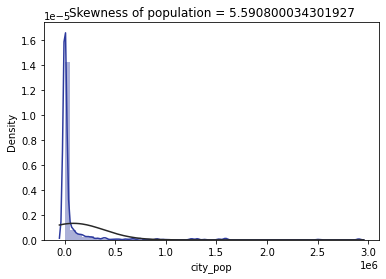

In [25]:
skewness = str(skew(total['city_pop']))
sns.distplot(total['city_pop'],fit = norm,color = randomcolor())
plt.title("Skewness of population"+" = "+skewness)
plt.show()

C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


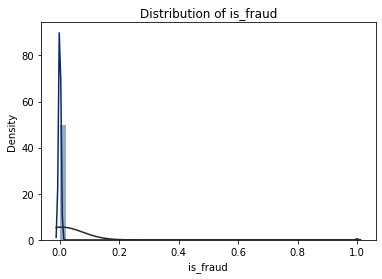

In [26]:
sns.distplot(total['is_fraud'],fit = norm,color = randomcolor())
plt.title("Distribution of is_fraud")
plt.show()


Certain numerical  columns are not needed for modeling and hence can be removed.

Moreover,a lot of the data is highly skewed.

one insight is that proportion of non fraud transactions are much much larger than fraud transactions so we are looking at an imbalanced dataset.


In [27]:
total.drop(['cc_num','merchant','first','last','street','zip','trans_num','unix_time'],axis=1,inplace=True)
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   city                   object        
 5   state                  object        
 6   lat                    float64       
 7   long                   float64       
 8   city_pop               int64         
 9   job                    object        
 10  dob                    datetime64[ns]
 11  merch_lat              float64       
 12  merch_long             float64       
 13  is_fraud               int64         
 14  trans_date             datetime64[ns]
dtypes: datetime64[ns](3), float64(5), int64(2), object(5)
memory usage: 226.1+ MB


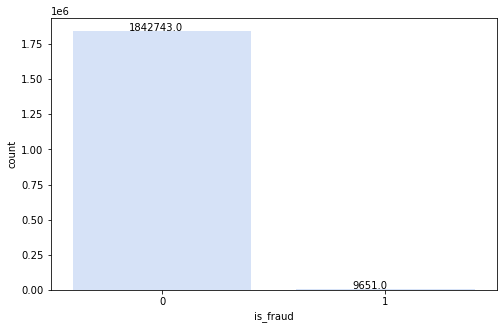

In [28]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="is_fraud", data=total,color=randomcolor())
for p in ax.patches:
     ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

only around 10,000 entries represent fraud transactions out of nearly 1.8 million entries, hence we are looking at an imbalanced dataset.

creating age variable from transaction dates and DOB.

In [29]:
total["age"] = total["trans_date"]-total["dob"]
total["age"]=total["age"].astype('timedelta64[Y]')
total["age"].head()

0    52.0
1    30.0
2    49.0
3    32.0
4    64.0
Name: age, dtype: float64

In [30]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   city                   object        
 5   state                  object        
 6   lat                    float64       
 7   long                   float64       
 8   city_pop               int64         
 9   job                    object        
 10  dob                    datetime64[ns]
 11  merch_lat              float64       
 12  merch_long             float64       
 13  is_fraud               int64         
 14  trans_date             datetime64[ns]
 15  age                    float64       
dtypes: datetime64[ns](3), float64(6), int64(2), object(5)
memory usage: 240.3+ MB


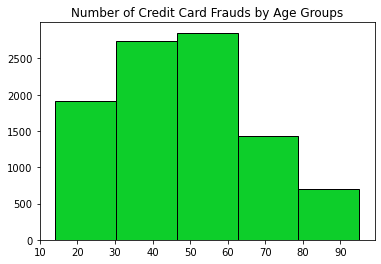

In [31]:
fraud=total[total["is_fraud"]==1]
fig, ax = plt.subplots()
ax.hist(fraud.age, edgecolor = "black", bins = 5, color=randomcolor())
plt.title("Number of Credit Card Frauds by Age Groups")
plt.show()

creating transacation month and transaction year columns

In [32]:
total['trans_month'] = pd.DatetimeIndex(total['trans_date']).month
total['trans_year'] = pd.DatetimeIndex(total['trans_date']).year

In [33]:
import calendar
total['Month_name'] = total['trans_month'].apply(lambda x: calendar.month_abbr[x])

C:\Users\surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


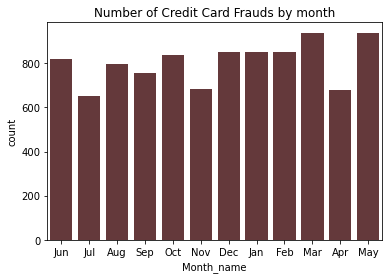

In [34]:
sns.countplot(total[total["is_fraud"]==1]["Month_name"],color=randomcolor())
plt.title("Number of Credit Card Frauds by month")
plt.show()
del total['Month_name']

C:\Users\surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


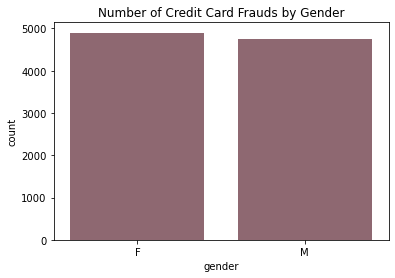

In [35]:
sns.countplot(total[total["is_fraud"]==1]["gender"],color=randomcolor())
plt.title("Number of Credit Card Frauds by Gender")
plt.show()

C:\Users\surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


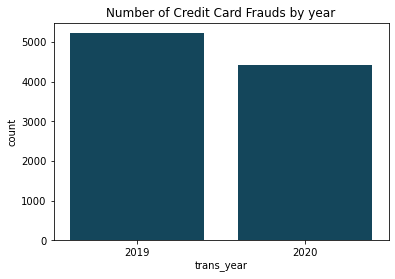

In [36]:
sns.countplot(total[total["is_fraud"]==1]["trans_year"],color=randomcolor())
plt.title("Number of Credit Card Frauds by year")
plt.show()

Finding distance from customer location to merchant location in degrees latitude and degrees longitude

In [37]:
total['latitudinal_distance'] = abs(round(total['merch_lat']-total['lat'],3))
total['longitudinal_distance'] = abs(round(total['merch_long']-total['long'],3))

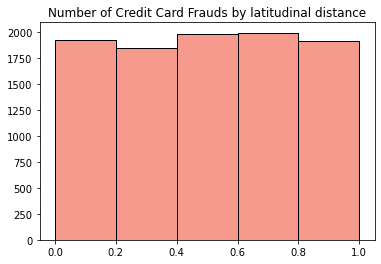

In [38]:
fraud = total[total["is_fraud"]==1]
fig, ax = plt.subplots()
ax.hist(fraud.latitudinal_distance, edgecolor = "black", bins = 5, color=randomcolor())
plt.title("Number of Credit Card Frauds by latitudinal distance")
plt.show()

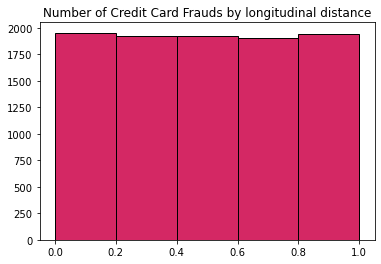

In [39]:
fig, ax = plt.subplots()
ax.hist(fraud.longitudinal_distance, edgecolor = "black", bins = 5, color=randomcolor())
plt.title("Number of Credit Card Frauds by longitudinal distance")
plt.show()

In [40]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   city                   object        
 5   state                  object        
 6   lat                    float64       
 7   long                   float64       
 8   city_pop               int64         
 9   job                    object        
 10  dob                    datetime64[ns]
 11  merch_lat              float64       
 12  merch_long             float64       
 13  is_fraud               int64         
 14  trans_date             datetime64[ns]
 15  age                    float64       
 16  trans_month            int64         
 17  trans_year             int64         
 18  latitudinal_distance  

changing gender values to binary values

In [41]:
total.gender.value_counts()

F    1014749
M     837645
Name: gender, dtype: int64

In [42]:
total.gender=total.gender.apply(lambda x: 1 if x=="M" else 0)
total.gender.value_counts()

0    1014749
1     837645
Name: gender, dtype: int64

Dropping final set of variables not useful for model building

In [43]:
drop_cols = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
total=total.drop(drop_cols,axis=1)
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   category               object 
 1   amt                    float64
 2   gender                 int64  
 3   city_pop               int64  
 4   is_fraud               int64  
 5   age                    float64
 6   trans_month            int64  
 7   trans_year             int64  
 8   latitudinal_distance   float64
 9   longitudinal_distance  float64
dtypes: float64(4), int64(5), object(1)
memory usage: 155.5+ MB


In [44]:
total = pd.get_dummies(total,columns=['category'],drop_first=True)
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   gender                   int64  
 2   city_pop                 int64  
 3   is_fraud                 int64  
 4   age                      float64
 5   trans_month              int64  
 6   trans_year               int64  
 7   latitudinal_distance     float64
 8   longitudinal_distance    float64
 9   category_food_dining     uint8  
 10  category_gas_transport   uint8  
 11  category_grocery_net     uint8  
 12  category_grocery_pos     uint8  
 13  category_health_fitness  uint8  
 14  category_home            uint8  
 15  category_kids_pets       uint8  
 16  category_misc_net        uint8  
 17  category_misc_pos        uint8  
 18  category_personal_care   uint8  
 19  category_shopping_net    uint8  
 20  category_shopping_pos    uint8  
 21  category

In [45]:
total.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_food_dining,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,333497,0,52.0,6,2020,0.020,0.265,0,...,0,0,0,0,0,0,1,0,0,0
1,29.84,0,302,0,30.0,6,2020,0.870,0.476,0,...,0,0,0,0,0,0,1,0,0,0
2,41.28,0,34496,0,49.0,6,2020,0.177,0.660,0,...,0,1,0,0,0,0,0,0,0,0
3,60.05,1,54767,0,32.0,6,2020,0.243,0.064,0,...,0,0,0,0,0,1,0,0,0,0
4,3.19,1,1126,0,64.0,6,2020,0.706,0.868,0,...,0,0,0,0,0,0,0,0,0,1


### Model Building

In [46]:
from sklearn.model_selection import train_test_split

Correcting the imbalance discovered by using resample

In [47]:
from sklearn.utils import resample

In [48]:
#create two different dataframe of majority and minority class 
df_majority = total[(total['is_fraud']==0)] 
df_minority = total[(total['is_fraud']==1)] 

df_majority.shape,df_minority.shape

((1842743, 22), (9651, 22))

In [49]:
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 1842743, # to match majority class
                                 random_state=42)  # reproducible results
df_minority_upsampled.shape

(1842743, 22)

In [50]:
# Combine majority class with upsampled minority class
total_upsampled = pd.concat([df_minority_upsampled, df_majority])
total_upsampled.shape

(3685486, 22)

In [51]:
x_cols = list(total_upsampled.columns)
x_cols.remove('is_fraud')
x_cols

['amt',
 'gender',
 'city_pop',
 'age',
 'trans_month',
 'trans_year',
 'latitudinal_distance',
 'longitudinal_distance',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos',
 'category_travel']

In [52]:
X = total_upsampled[x_cols]
Y = total_upsampled['is_fraud']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3685486 entries, 909017 to 1296674
Data columns (total 21 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   gender                   int64  
 2   city_pop                 int64  
 3   age                      float64
 4   trans_month              int64  
 5   trans_year               int64  
 6   latitudinal_distance     float64
 7   longitudinal_distance    float64
 8   category_food_dining     uint8  
 9   category_gas_transport   uint8  
 10  category_grocery_net     uint8  
 11  category_grocery_pos     uint8  
 12  category_health_fitness  uint8  
 13  category_home            uint8  
 14  category_kids_pets       uint8  
 15  category_misc_net        uint8  
 16  category_misc_pos        uint8  
 17  category_personal_care   uint8  
 18  category_shopping_net    uint8  
 19  category_shopping_pos    uint8  
 20  category_travel          uint8  
dtypes: 

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(
 X, Y, test_size=0.3, random_state=42)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import HalvingRandomSearchCV,RandomizedSearchCV

### Scaling the x variables

In [55]:
X_train.dtypes

amt                        float64
gender                       int64
city_pop                     int64
age                        float64
trans_month                  int64
trans_year                   int64
latitudinal_distance       float64
longitudinal_distance      float64
category_food_dining         uint8
category_gas_transport       uint8
category_grocery_net         uint8
category_grocery_pos         uint8
category_health_fitness      uint8
category_home                uint8
category_kids_pets           uint8
category_misc_net            uint8
category_misc_pos            uint8
category_personal_care       uint8
category_shopping_net        uint8
category_shopping_pos        uint8
category_travel              uint8
dtype: object

In [56]:
sc= StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

print(X_train_std)

[[-0.76367673  1.05751042 -0.28696288 ... -0.42380542 -0.33265961
  -0.15585472]
 [-0.77239994 -0.94561716 -0.1803394  ...  2.35957341 -0.33265961
  -0.15585472]
 [ 0.07433703 -0.94561716 -0.28109273 ... -0.42380542 -0.33265961
  -0.15585472]
 ...
 [-0.7896602   1.05751042 -0.00772941 ... -0.42380542 -0.33265961
  -0.15585472]
 [-0.61115343 -0.94561716 -0.27500541 ... -0.42380542 -0.33265961
  -0.15585472]
 [-0.7896602  -0.94561716 -0.29359312 ...  2.35957341 -0.33265961
  -0.15585472]]


### Feature Importances

In [57]:
logit_model= LogisticRegression(solver='liblinear')
logit_model.fit(X_train_std, Y_train)

LogisticRegression(solver='liblinear')

In [58]:
feature= pd.DataFrame()
feature['column']= X_train.columns
feature['importance']= logit_model.coef_[0]
feature.sort_values('importance', ascending=False, inplace=True)
feature

,column,importance
0,amt,4.027204
9,category_gas_transport,0.821690
11,category_grocery_pos,0.700215
17,category_personal_care,0.484034
14,category_kids_pets,0.465313
16,category_misc_pos,0.454854
10,category_grocery_net,0.395396
20,category_travel,0.378825
12,category_health_fitness,0.358050
8,category_food_dining,0.325288


## Logistic Regression

In [59]:
pd.set_option('display.max_columns', None)
X_train.head()

,amt,gender,city_pop,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
724222,12.26,1,2092,57.0,11,2019,0.364,0.790,0,0,0,0,0,0,1,0,0,0,0,0,0
193843,8.98,0,34496,49.0,8,2020,0.831,0.309,0,0,0,0,0,0,0,0,0,0,1,0,0
828211,327.36,0,3876,59.0,12,2019,0.349,0.183,0,0,0,1,0,0,0,0,0,0,0,0,0
277282,2.60,0,54287,48.0,10,2020,0.616,0.483,0,0,0,0,0,0,0,0,0,0,0,1,0
851181,1.42,0,1478,54.0,12,2019,0.589,0.611,0,0,0,0,0,0,1,0,0,0,0,0,0


In [60]:
print(X_train_std[0])

[-0.76367673  1.05751042 -0.28696288  0.55210806  1.21696988 -0.96088814
 -0.4786524   1.00195498 -0.21967269 -0.31541439 -0.16531004 -0.4410031
 -0.21131502 -0.25540074  3.97585616 -0.30611265 -0.22338642 -0.23030642
 -0.42380542 -0.33265961 -0.15585472]


In [61]:
import pickle

Logit1=LogisticRegression(solver='liblinear')

Logit1.fit(X_train_std,Y_train)

with open('logmodel.pkl', 'wb') as f:
    pickle.dump(Logit1, f)
    
print("Score of the model with X-train and Y-train is : ", str(round(Logit1.score(X_train,Y_train)*100,2)),"%")
print("Score of the model with X-test and Y-test is : ", str(round(Logit1.score(X_test,Y_test)*100,2)),"%")

Y_pred=Logit1.predict(X_test_std)

print( " Mean absolute error is ",( mean_absolute_error(Y_test,Y_pred)))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy is " , round(accuracy_score(Y_test,Y_pred)*100,2),"%")
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Score of the model with X-train and Y-train is :  67.95 %


C:\Users\surya\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Score of the model with X-test and Y-test is :  67.92 %
 Mean absolute error is  0.17727283416210976
 Mean squared  error is  0.17727283416210976
 Median absolute error is  0.0
Accuracy is  82.27 %
F1 score:  82.18 %


In [62]:
a1 = [[327.36, 0, 3876, 59, 12, 2019, 0.349, 0.183, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

ans = sc.fit_transform(a1)

out=Logit1.predict(ans)
print(out[0])

1


### Fine Tuning

In [63]:
X_train_new=X_train[[x for x in feature[feature["importance"]>0].column]]
X_test_new=X_test[[x for x in feature[feature["importance"]>0].column]]

checking p values & variance inflation factor

In [64]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

C:\Users\surya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\surya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [65]:
X_train_sm = sm.add_constant(X_train_new)
logm = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

C:\Users\surya\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_fraud   No. Observations:              2579840
Model:                            GLM   Df Residuals:                  2579826
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.6068e+05
Date:                Tue, 04 Apr 2023   Deviance:                   1.9214e+06
Time:                        10:45:39   Pearson chi2:                 1.05e+18
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.3127      0.011   -393.652      0.000      -4.334      -4.291
amt                         0.0101   1.68e-05    599.930      0.000       0.010       0.010
category_gas_transport      3.5436      0.010    358.227      0.000       3.524       3.563
category_grocery_pos        2.6769      0.008    336.484      0.000       2.661       2.692
category_personal_care      2.9094      0.011    268.012      0.000       2.888       2.931
category_kids_pets          2.6713      0.011    251.502      0.000       2.650       2.692
category_misc_pos           2.8207      0.011    247.250      0.000       2.798       2.843
category_grocery_net        3.1335      0.012    259.111      0.000       3.110       3.157
category_travel             3.1722      0.013    239.479      0.000       3.146       3.198
category_health_fitness     2.4608      0.011    214.340      0.000       2.438       2.483
category_food_dining        2.2673      0.011    205.154      0.000       2.246       2.289
category_home               1.7122      0.010    166.849      0.000       1.692       1.732
age                         0.0017      0.000     16.591      0.000       0.001       0.002
latitudinal_distance        0.0496      0.006      7.999      0.000       0.037       0.062
===========================================================================================
"""

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,age,4.74
12,latitudinal_distance,3.30
0,amt,2.17
2,category_grocery_pos,1.43
1,category_gas_transport,1.36
4,category_kids_pets,1.21
3,category_personal_care,1.19
10,category_home,1.19
8,category_health_fitness,1.15
9,category_food_dining,1.15


since all columns have VIF < 5 , we'll continue with all columns

In [67]:
#x_train_vif_adj = X_train_new[[x for x in list(vif[vif['VIF']<=5]['Features'])]]
x_train_vif_adj = X_train_new
#x_test_vif_adj = X_test_new[[x for x in list(vif[vif['VIF']<=5]['Features'])]]
x_test_vif_adj = X_test_new


Scaling the new test and train sets

In [68]:
sc= StandardScaler()
X_train_vif_adj_std=sc.fit_transform(x_train_vif_adj)
X_test_vif_adj_std = sc.fit_transform(x_test_vif_adj)

Training a new Logistic Regression Model to reflect the changes-

In [69]:
Logit2=LogisticRegression(solver='liblinear')

Logit2.fit(X_train_vif_adj_std,Y_train)

print("Score of the model with X-train and Y-train is : ", str(round(Logit2.score(X_train_vif_adj_std,Y_train)*100,2)),"%")
print("Score of the model with X-test and Y-test is : ", str(round(Logit2.score(X_test_vif_adj_std,Y_test)*100,2)),"%")

Y_pred=Logit2.predict(X_test_vif_adj_std)

print( " Mean absolute error is ",( mean_absolute_error(Y_test,Y_pred)))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy is " , round(accuracy_score(Y_test,Y_pred)*100,2),"%")
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score of the model with X-train and Y-train is :  82.34 %
Score of the model with X-test and Y-test is :  82.17 %
 Mean absolute error is  0.17834098798349562
 Mean squared  error is  0.17834098798349562
 Median absolute error is  0.0
Accuracy is  82.17 %
F1 score:  82.05 %


In [70]:
matrix = confusion_matrix(Y_test,Y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)


tp, fn, fp, tn = confusion_matrix(Y_test,Y_pred,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)


matrix = classification_report(Y_test,Y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[410545 142287]
 [ 54895 497919]]
Outcome values : 
 410545 142287 54895 497919
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.74      0.81    552832
           0       0.78      0.90      0.83    552814

    accuracy                           0.82   1105646
   macro avg       0.83      0.82      0.82   1105646
weighted avg       0.83      0.82      0.82   1105646



C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


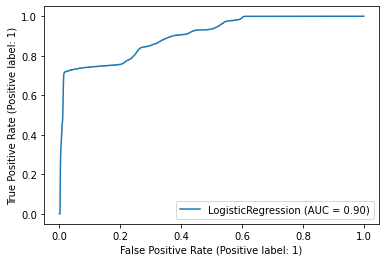

In [71]:
plot_roc_curve(Logit2, X_test_vif_adj_std, Y_test)
plt.show()

## Decision Tree

In [72]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

### Feature Importances using Decision Tree

amt -  0.7281392901640079
gender -  0.003647159735627018
city_pop -  0.02110547982978857
age -  0.027031302717016335
trans_month -  0.006893028767127751
trans_year -  0.0015728272955361745
latitudinal_distance -  0.011969800140499854
longitudinal_distance -  0.011921160285641528
category_food_dining -  0.01371371411292894
category_gas_transport -  0.07416727189845906
category_grocery_net -  0.0260193660155596
category_grocery_pos -  0.0012803490921376394
category_health_fitness -  0.0034183036910789295
category_home -  0.016132430847011263
category_kids_pets -  0.003612663753477291
category_misc_net -  0.002265917927183186
category_misc_pos -  0.013542564363879458
category_personal_care -  0.004939094682885193
category_shopping_net -  0.007897488604454436
category_shopping_pos -  0.004188681975890267
category_travel -  0.016542104099809548


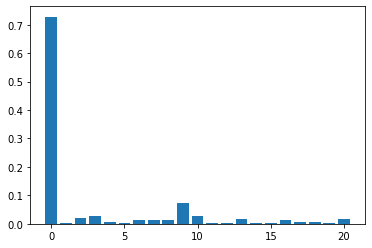

In [73]:
importance = dtc.feature_importances_
for i,v in enumerate(importance):
    print(X_train.columns[int(i)],"- ",v)
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [74]:
X_train.columns

Index(['amt', 'gender', 'city_pop', 'age', 'trans_month', 'trans_year',
       'latitudinal_distance', 'longitudinal_distance', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel'],
      dtype='object')

In [75]:
X_train.dtypes

amt                        float64
gender                       int64
city_pop                     int64
age                        float64
trans_month                  int64
trans_year                   int64
latitudinal_distance       float64
longitudinal_distance      float64
category_food_dining         uint8
category_gas_transport       uint8
category_grocery_net         uint8
category_grocery_pos         uint8
category_health_fitness      uint8
category_home                uint8
category_kids_pets           uint8
category_misc_net            uint8
category_misc_pos            uint8
category_personal_care       uint8
category_shopping_net        uint8
category_shopping_pos        uint8
category_travel              uint8
dtype: object

In [76]:
X_train.head()

,amt,gender,city_pop,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
724222,12.26,1,2092,57.0,11,2019,0.364,0.790,0,0,0,0,0,0,1,0,0,0,0,0,0
193843,8.98,0,34496,49.0,8,2020,0.831,0.309,0,0,0,0,0,0,0,0,0,0,1,0,0
828211,327.36,0,3876,59.0,12,2019,0.349,0.183,0,0,0,1,0,0,0,0,0,0,0,0,0
277282,2.60,0,54287,48.0,10,2020,0.616,0.483,0,0,0,0,0,0,0,0,0,0,0,1,0
851181,1.42,0,1478,54.0,12,2019,0.589,0.611,0,0,0,0,0,0,1,0,0,0,0,0,0


In [78]:
print("Score the X-train with Y-train is : ", dtc.score(X_train,Y_train))
print("Score the X-test  with Y-test  is : ", dtc.score(X_test,Y_test))

Y_pred=dtc.predict(X_test)

# ans = dtc.predict(24.84,'F',23,53,2020)
print()

print( " Mean absolute error is ", mean_absolute_error(Y_test,Y_pred))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy score " , accuracy_score(Y_test,Y_pred))
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.9990204821434708

 Mean absolute error is  0.0009795178565291242
 Mean squared  error is  0.0009795178565291242
 Median absolute error is  0.0
Accuracy score  0.9990204821434708
F1 score:  99.9 %


Perfect score on training set indicates overfitting. Using hyperparameter tuning.
### Hyperparameter Tuning

In [79]:
#Normal Randomised Search takes too much time to execute on a dataset this large.
"""dtc1 = DecisionTreeClassifier()


params_dtc = {  
    "splitter":["best"],
    'max_depth': [10, 20, 50, 100, 200],
    'min_samples_leaf': [10, 20, 50, 100, 200],
    'min_samples_split' : [10, 20, 50, 100, 200],
    'criterion': ["gini", "entropy"]
}
random_search=RandomizedSearchCV(estimator=dtc1,param_distributions = params_dtc, scoring = 'f1',cv=5,n_iter=100)
random_search.fit(X_train,Y_train)"""

'dtc1 = DecisionTreeClassifier()\n\n\nparams_dtc = {  \n    "splitter":["best"],\n    \'max_depth\': [10, 20, 50, 100, 200],\n    \'min_samples_leaf\': [10, 20, 50, 100, 200],\n    \'min_samples_split\' : [10, 20, 50, 100, 200],\n    \'criterion\': ["gini", "entropy"]\n}\nrandom_search=RandomizedSearchCV(estimator=dtc1,param_distributions = params_dtc, scoring = \'f1\',cv=5,n_iter=100)\nrandom_search.fit(X_train,Y_train)'

Since dataset is very large(close to 1.8 million rows originally and even more after treating for unbalanced condition),
we will use halving randomized search cross validation which is an experimental variant of the randomised search, much  faster compared to either randomised search or grid search cross validation.


In [80]:
dtc1 = DecisionTreeClassifier()

params_dtc = {
    'max_depth': [10, 20, 50, 100, 200],
    'min_samples_leaf': [10, 20, 50, 100, 200],
    'min_samples_split' : [10, 20, 50, 100, 200],
    'criterion': ["gini", "entropy"]
} 

halving_random_search=HalvingRandomSearchCV(estimator=dtc1,param_distributions = params_dtc,cv=5)
halving_random_search.fit(X_train,Y_train)
print(halving_random_search.best_params_)

C:\Users\surya\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 250 is smaller than n_iter=128992. Running 250 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'min_samples_split': 50, 'min_samples_leaf': 10, 'max_depth': 200, 'criterion': 'gini'}


In [81]:
print(halving_random_search.best_params_)

{'min_samples_split': 50, 'min_samples_leaf': 10, 'max_depth': 200, 'criterion': 'gini'}


In [82]:
dtc2 = DecisionTreeClassifier(min_samples_split= 100, min_samples_leaf= 20, max_depth= 200, criterion= 'gini')
dtc2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=200, min_samples_leaf=20,
                       min_samples_split=100)

In [83]:
print("Score the X-train with Y-train is : ", dtc2.score(X_train,Y_train))
print("Score the X-test  with Y-test  is : ", dtc2.score(X_test,Y_test))

Y_pred=dtc2.predict(X_test)

print( " Mean absolute error is ", mean_absolute_error(Y_test,Y_pred))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy score " , accuracy_score(Y_test,Y_pred))
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score the X-train with Y-train is :  0.9969672537831804
Score the X-test  with Y-test  is :  0.9964220012553747
 Mean absolute error is  0.003577998744625314
 Mean squared  error is  0.003577998744625314
 Median absolute error is  0.0
Accuracy score  0.9964220012553747
F1 score:  99.64 %


In [84]:
matrix = confusion_matrix(Y_test,Y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)


tp, fn, fp, tn = confusion_matrix(Y_test,Y_pred,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)


matrix = classification_report(Y_test,Y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[552832      0]
 [  3956 548858]]
Outcome values : 
 552832 0 3956 548858
Classification report : 
               precision    recall  f1-score   support

           1       0.99      1.00      1.00    552832
           0       1.00      0.99      1.00    552814

    accuracy                           1.00   1105646
   macro avg       1.00      1.00      1.00   1105646
weighted avg       1.00      1.00      1.00   1105646



C:\Users\surya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


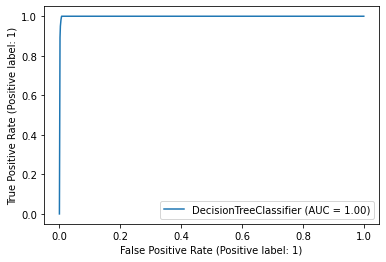

In [85]:
plot_roc_curve(dtc2, X_test, Y_test)
plt.show()

In accordance with the confusion matrix, the roc curve is almost perfect.